In [1]:
import mplfinance as mpf
from pandas_datareader import data
import warnings
warnings.simplefilter('ignore')
import datetime as dt
import yfinance as yf
yf.pdr_override()

In [2]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 6, 30)

df = data.get_data_yahoo('^N225', start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000
2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000
2020-01-08,23217.490234,23303.210938,22951.179688,23204.759766,23204.759766,79400000
2020-01-09,23530.289062,23767.089844,23506.150391,23739.869141,23739.869141,62200000
2020-01-10,23813.279297,23903.289062,23761.080078,23850.570312,23850.570312,55900000
2020-01-14,23969.039062,24059.859375,23951.660156,24025.169922,24025.169922,64200000
2020-01-15,23923.480469,23997.390625,23875.820312,23916.580078,23916.580078,57200000
2020-01-16,23960.199219,23975.380859,23905.380859,23933.130859,23933.130859,55400000
2020-01-17,24103.449219,24115.949219,24013.750000,24041.259766,24041.259766,59400000


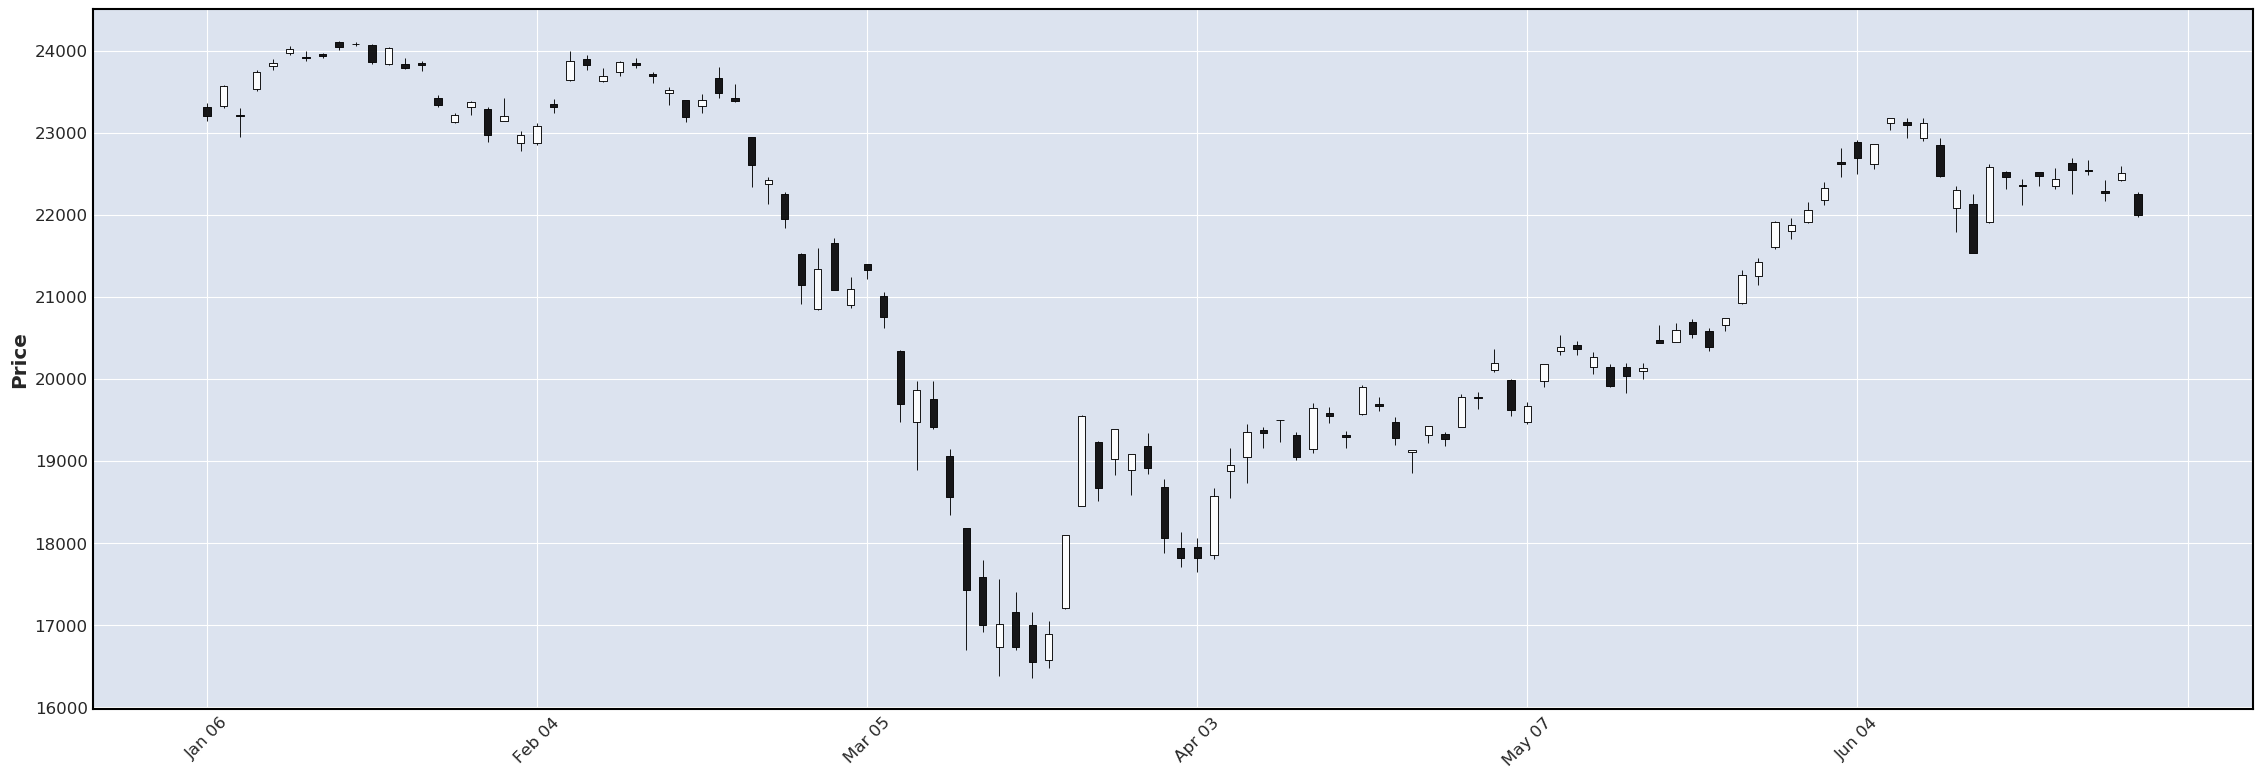

In [4]:
mpf.plot(df, type='candle', figsize=(30,10))

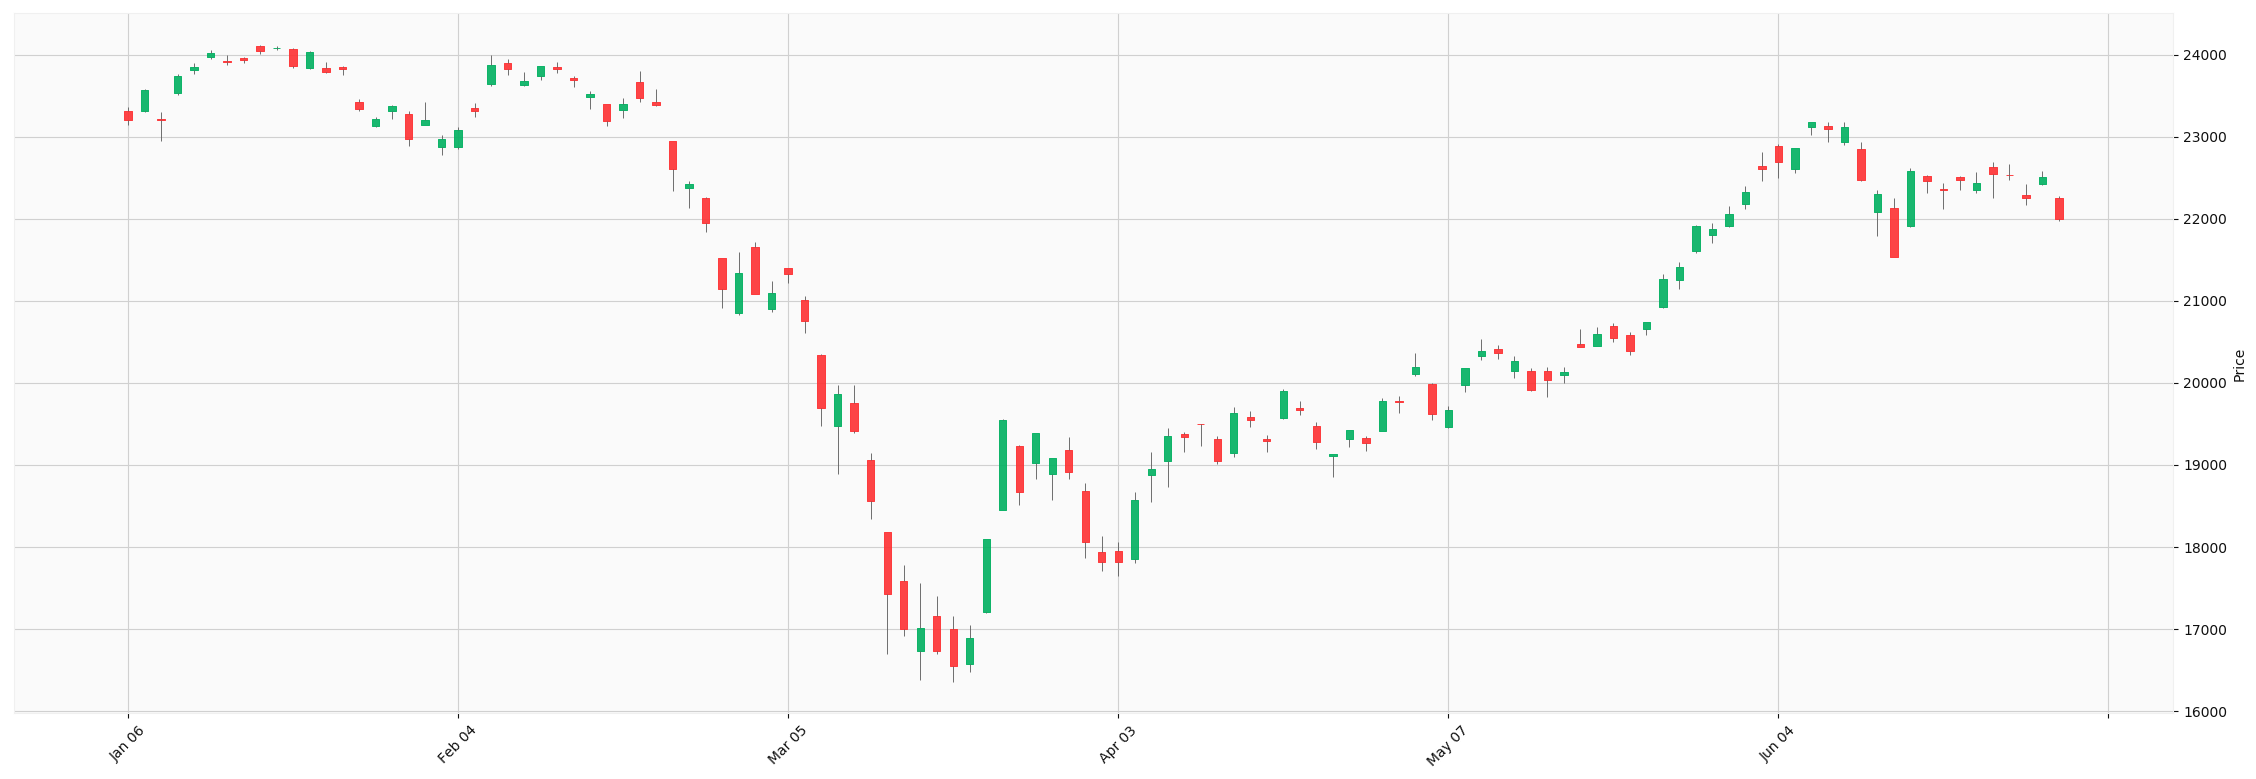

In [5]:
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo')

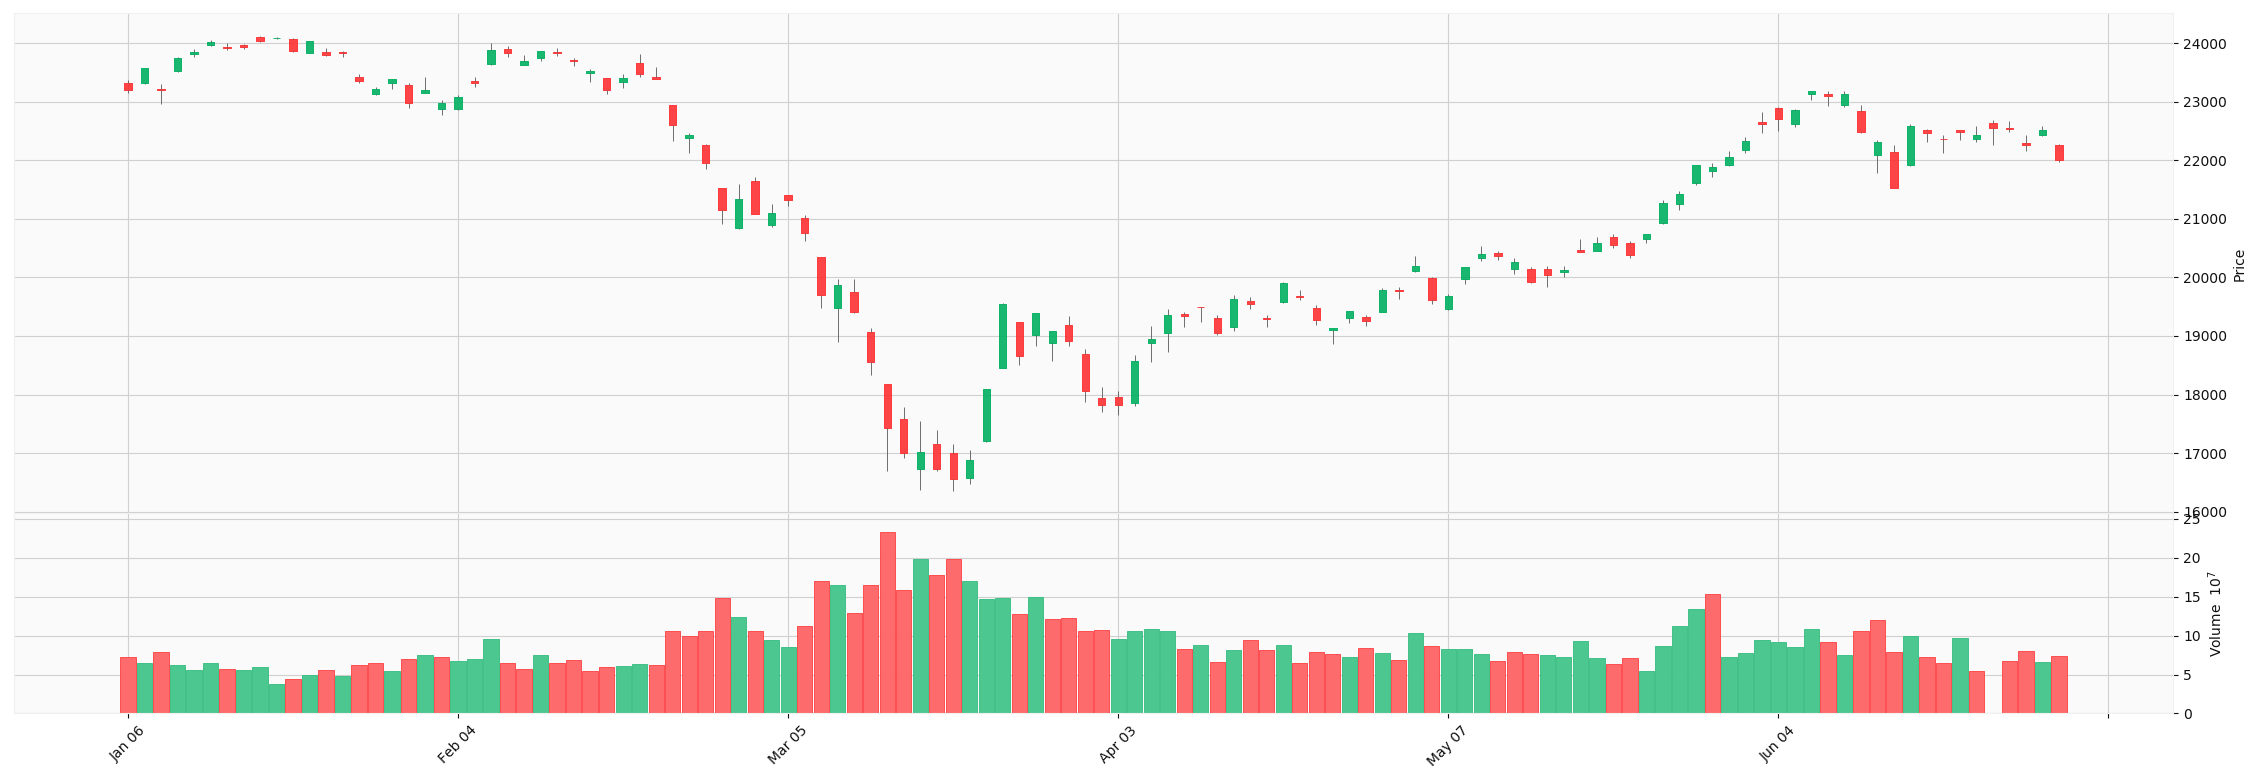

In [7]:
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', volume=True)

In [8]:
import talib as ta
# ボリンジャーバンド用のdfを作成
# matype: 0:SMA, 1:WMA, 2:DEMA, 3:TEMA, 4:TRIMA, 5:KAMA, 6:MAMA, 7:T3

df['upper'], df['middle'], df['lower'] = ta.BBANDS(df['Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,upper,middle,lower
Date,,,,,,,,,
2020-06-23,22636.060547,22693.890625,22257.140625,22549.050781,22549.050781,0,23699.792894,22075.402500,20451.012106
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,23668.783006,22152.969297,20637.155588
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,23589.084373,22221.268437,20853.452502
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,23454.238943,22306.225234,21158.211526
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,23321.613062,22356.360781,21391.108501


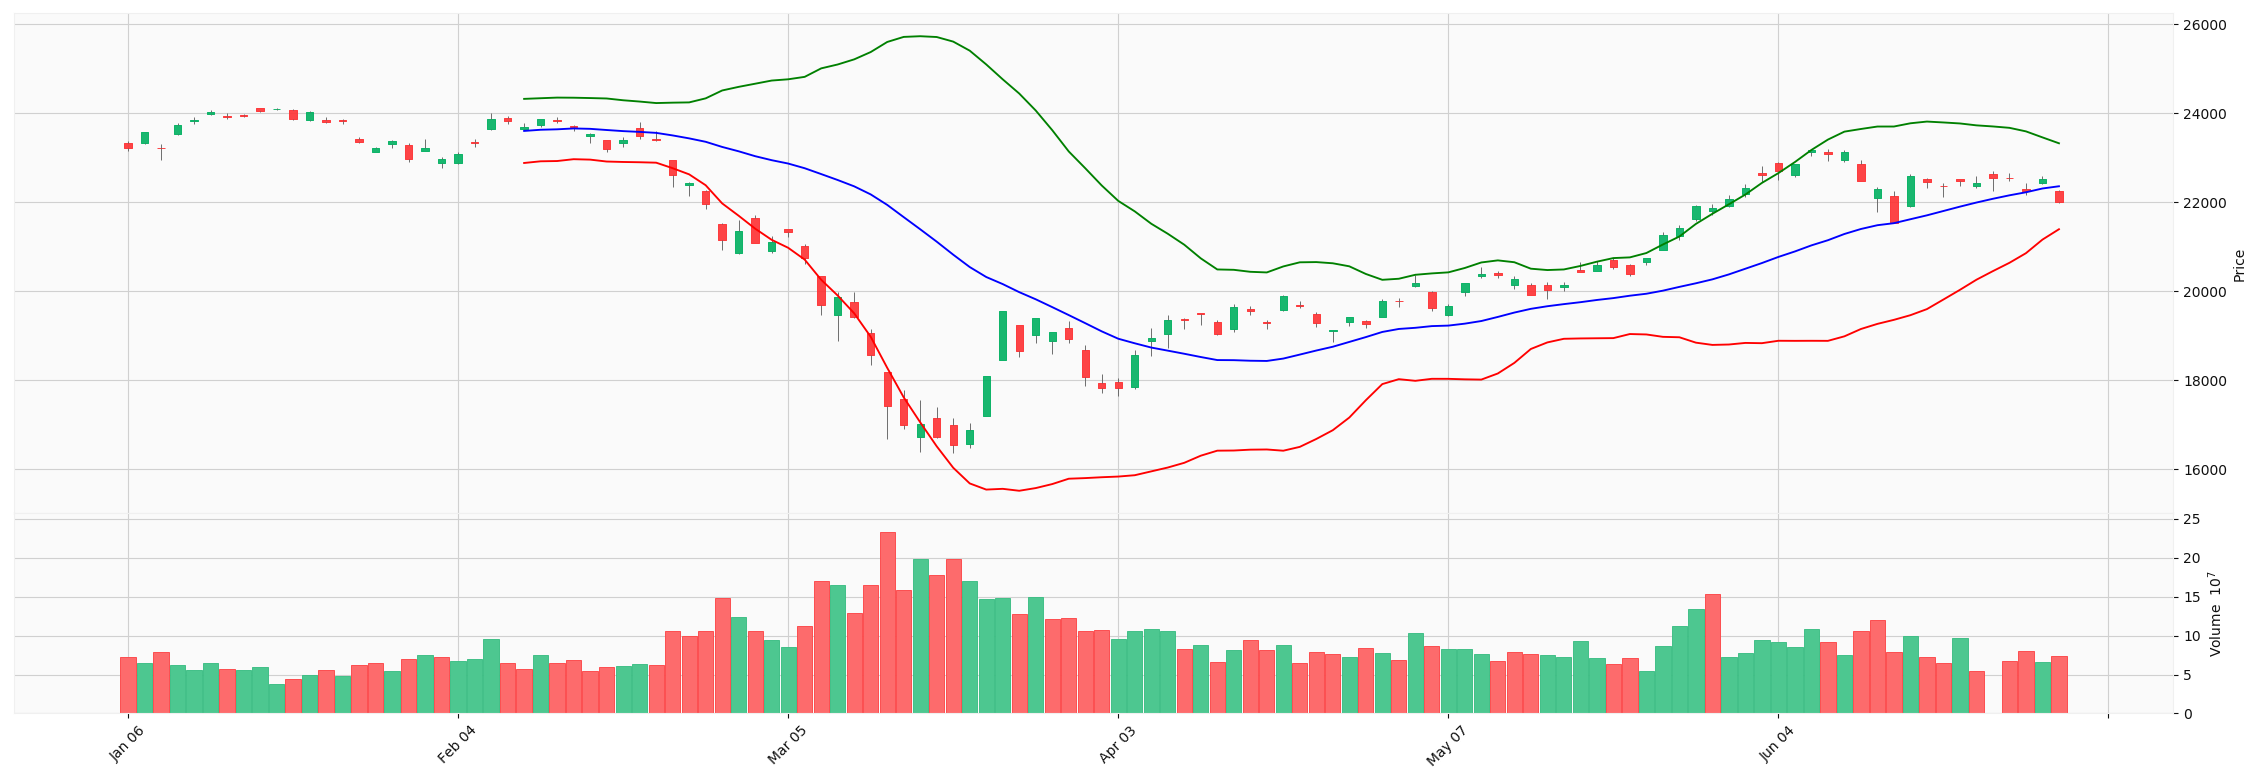

In [10]:
apds = [mpf.make_addplot(df['upper'], color='g'), mpf.make_addplot(df['middle'], color='b'), mpf.make_addplot(df['lower'], color='r')]
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', volume=True, addplot=apds)

In [13]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,upper,middle,lower,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-06-23,22636.060547,22693.890625,22257.140625,22549.050781,22549.050781,0,23699.792894,22075.402500,20451.012106,440.501875,543.504513,-103.002637
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,23668.783006,22152.969297,20637.155588,419.231405,518.649891,-99.418486
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,23589.084373,22221.268437,20853.452502,375.889013,490.097715,-114.208703
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,23454.238943,22306.225234,21158.211526,357.773441,463.632861,-105.859419
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,23321.613062,22356.360781,21391.108501,298.257702,430.557829,-132.300127


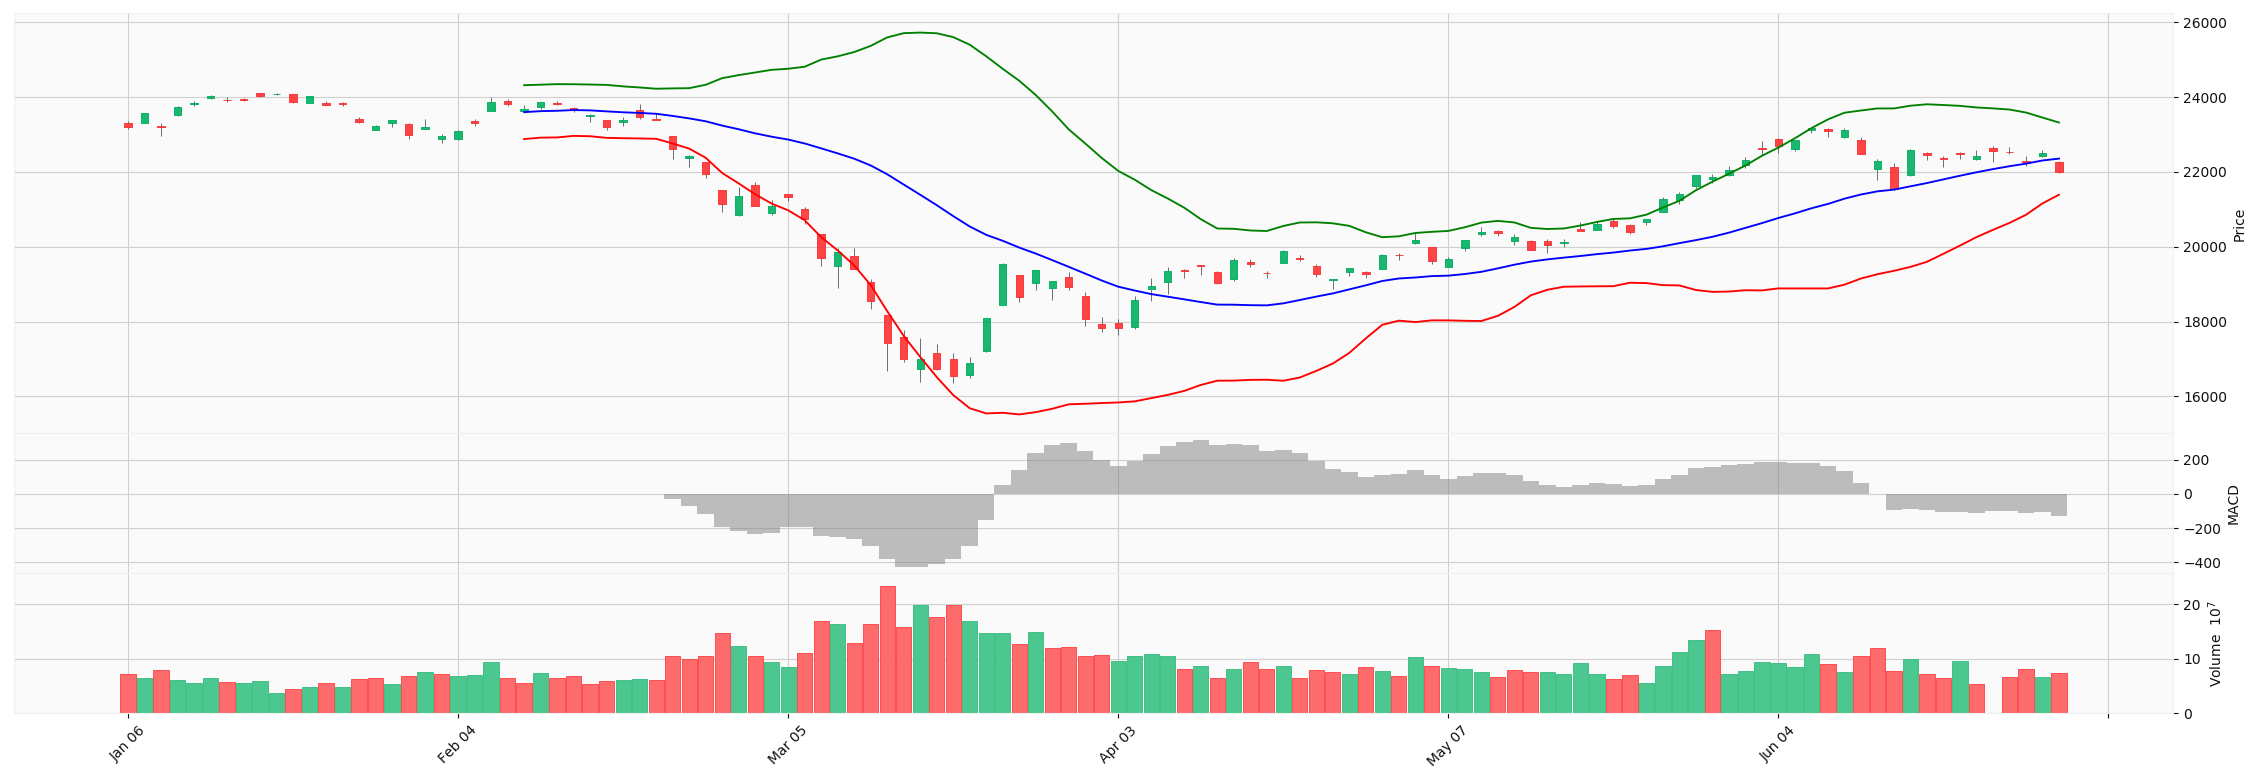

In [15]:
apds = [mpf.make_addplot(df['upper'], color='g'), mpf.make_addplot(df['middle'], color='b'), mpf.make_addplot(df['lower'], color='r'), mpf.make_addplot(df['macdhist'], type='bar', color='gray', width=1.0, panel=1, alpha=0.5, ylabel='MACD')]
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', volume=True, addplot=apds, volume_panel=2, panel_ratios=(3,1,1))

In [16]:
#RSIデータフレーム追加
df['RSI'] = ta.RSI(df['Close'], timeperiod=25)

In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,upper,middle,lower,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2020-06-23,22636.060547,22693.890625,22257.140625,22549.050781,22549.050781,0,23699.792894,22075.402500,20451.012106,440.501875,543.504513,-103.002637,58.425218
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,23668.783006,22152.969297,20637.155588,419.231405,518.649891,-99.418486,58.298703
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,23589.084373,22221.268437,20853.452502,375.889013,490.097715,-114.208703,55.946788
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,23454.238943,22306.225234,21158.211526,357.773441,463.632861,-105.859419,57.584822
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,23321.613062,22356.360781,21391.108501,298.257702,430.557829,-132.300127,53.350032


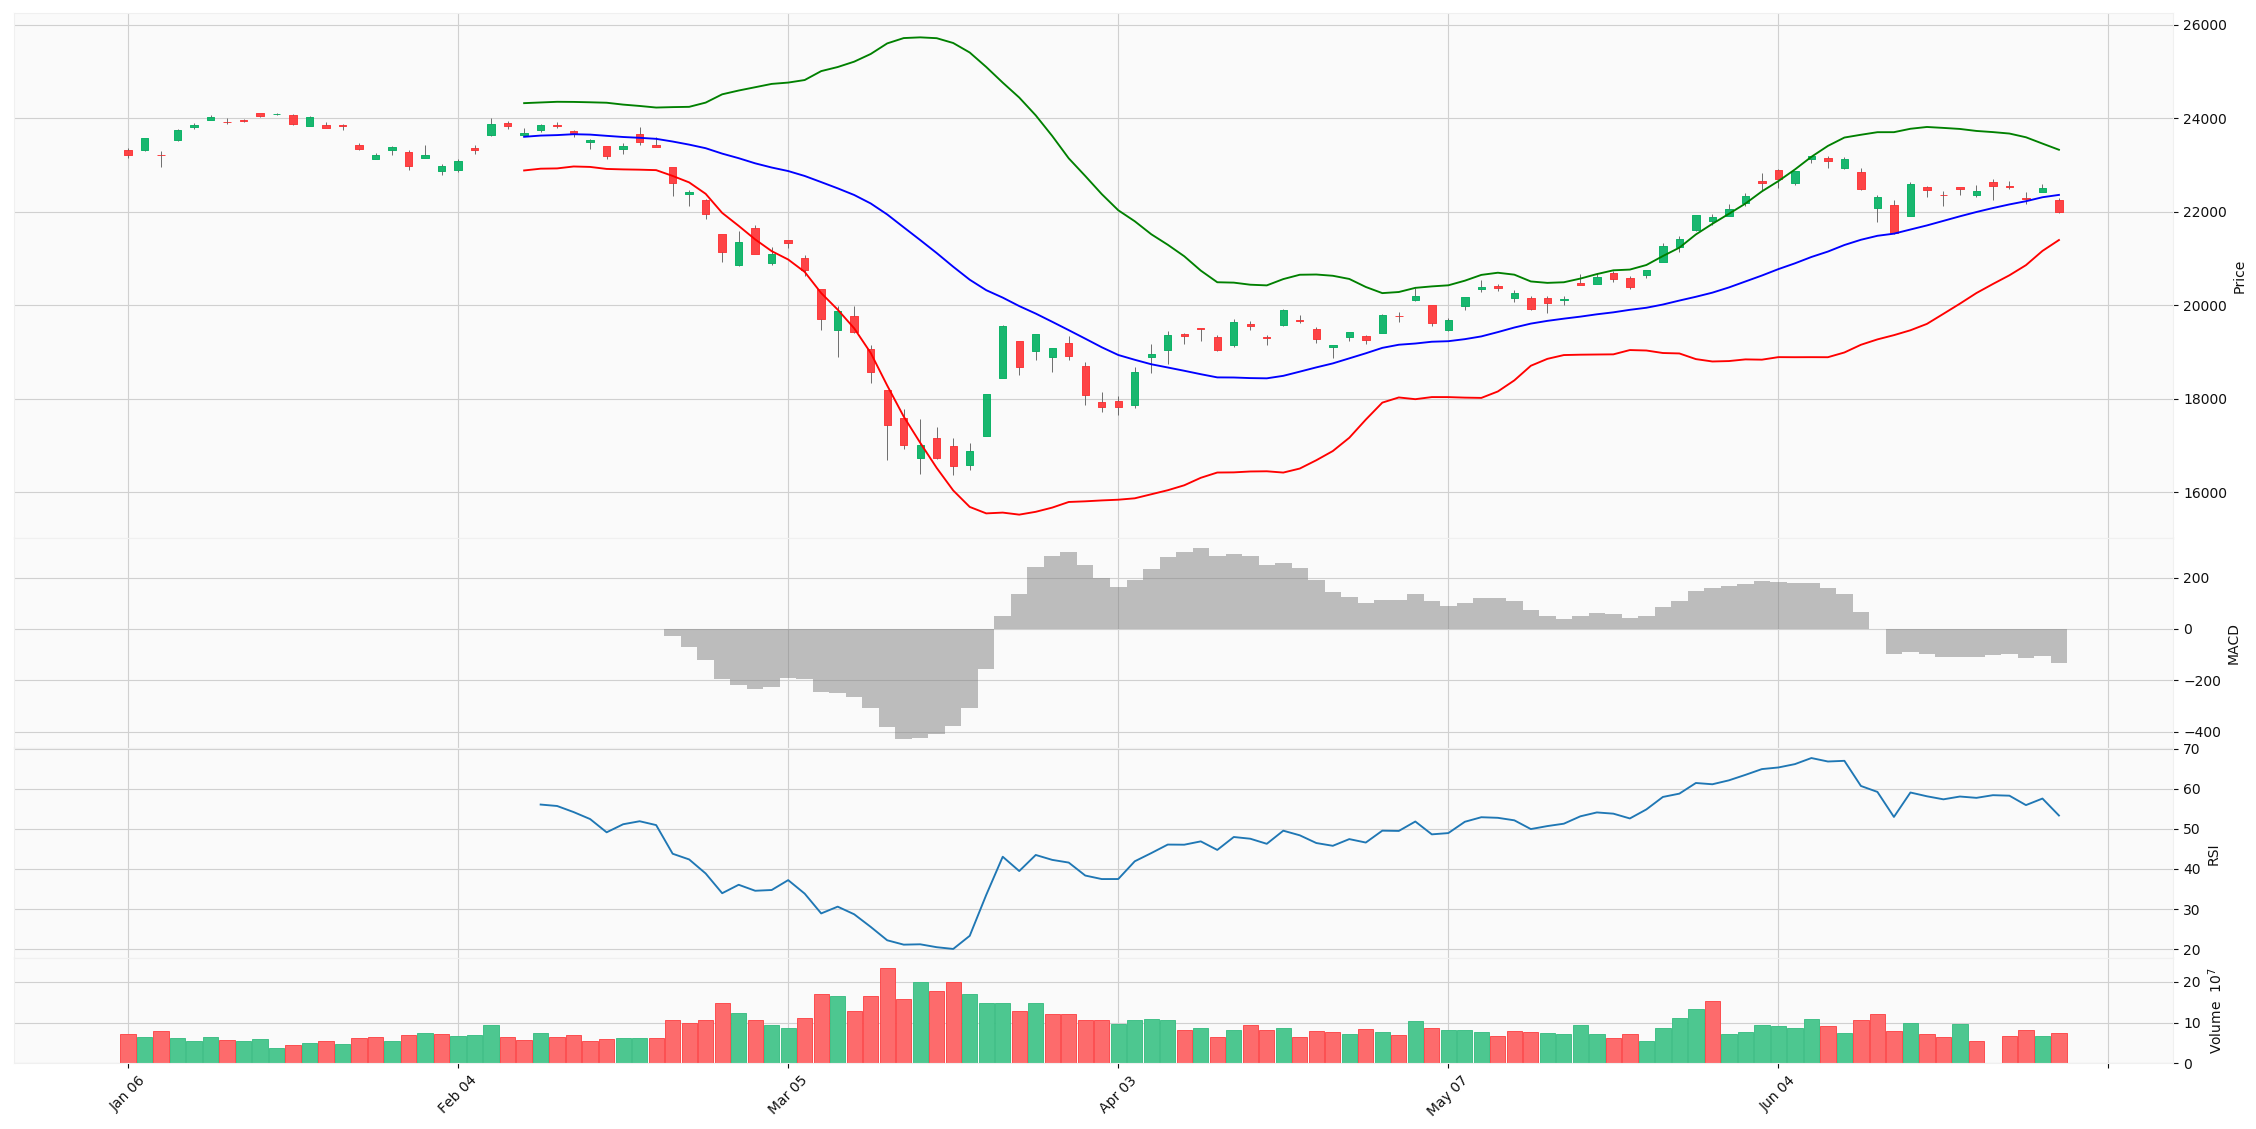

In [18]:
apds = [mpf.make_addplot(df['upper'], color='g'), mpf.make_addplot(df['middle'], color='b'), mpf.make_addplot(df['lower'], color='r'), mpf.make_addplot(df['macdhist'], type='bar', color='gray', width=1.0, panel=1, alpha=0.5, ylabel='MACD'), mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI')]
mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds, volume_panel=3, panel_ratios=(5,2,2,1))

In [19]:
mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds, volume_panel=3, panel_ratios=(5,2,2,1), savefig='technical.png')